In [1]:
import pandas as pd

df_air_reserve = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/air_reserve.csv",low_memory=False)
df_air_store_info = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/air_store_info.csv", low_memory=False)
df_air_visit_data = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/air_visit_data.csv", low_memory=False)
df_date_info = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/date_info.csv", low_memory=False)
df_hpg_reserve = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/hpg_reserve.csv", low_memory=False)
df_hpg_store_info = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/hpg_store_info.csv", low_memory=False)
df_store_id_relation = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/store_id_relation.csv", low_memory=False)
df_sample_submission = pd.read_csv("/Users/aa370031/Dropbox/学习资料/数据分析/kaggle/Recruit Restaurant Visitor Forecasting/sample_submission.csv", low_memory=False)

In [2]:
#air表结合
df_date_info.rename(columns={'calendar_date': 'visit_date'}, inplace=True)

df = pd.merge(df_air_visit_data, df_date_info, on='visit_date', how='left')
df_new_air = pd.merge(df, df_air_store_info, on='air_store_id', how='left')
df_new_air.sort_values(by='visit_date', inplace=True, ascending=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 <a list of 56 Text xticklabel objects>)

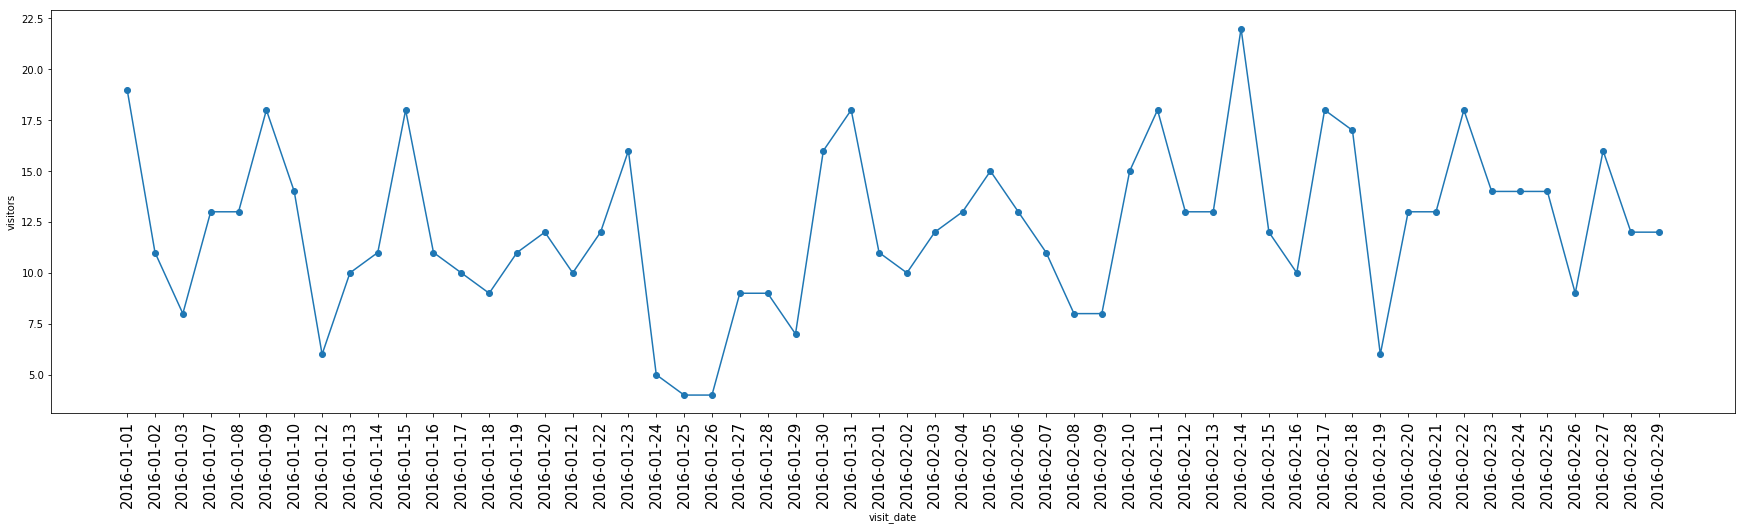

In [43]:
#画图检验
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick

df_check_air = df_new_air[(df_new_air.air_store_id=='air_fab092c35776a9b1')&(df_new_air.visit_date<'2016-03-01')]

plt.plot(df_check_air.visit_date, df_check_air.visitors, marker='o')
plt.xlabel('visit_date')
plt.ylabel('visitors')
plt.subplots_adjust(left=0.1,right=4,wspace=0.25,hspace=0.25,bottom=0.1,top=1.5)
plt.xticks(rotation=90, size=15)


In [4]:
df_air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [5]:
#hpg表结合
def trans_visit_datetime(date):
    date = date.split(' ')[0]
    return date

df_hpg_reserve['visit_date'] = ''
df_hpg_reserve.visit_date = df_hpg_reserve.visit_datetime.apply(lambda x: trans_visit_datetime(x))
df_check_hpg = pd.merge(df_hpg_reserve, df_hpg_store_info, on='hpg_store_id', how='left')
df_check_hpg = pd.merge(df_check_hpg, df_store_id_relation, on='hpg_store_id', how='left')
df_check_hpg = pd.merge(df_check_hpg, df_air_store_info, on='air_store_id', how='left')
df_check_hpg = pd.merge(df_check_hpg, df_date_info, on='visit_date', how='left')

In [6]:
#去除饭店信息为Nan的数据
df_hpg1 = df_check_hpg[(df_check_hpg.air_store_id==df_check_hpg.air_store_id)]
df_hpg2 = df_check_hpg[(df_check_hpg.air_store_id!=df_check_hpg.air_store_id)&(df_check_hpg.hpg_area_name==df_check_hpg.hpg_area_name)]

In [7]:
df_hpg1 = df_hpg1[['visit_date', 'reserve_datetime', 'reserve_visitors',
                 'air_store_id', 'air_genre_name', 'air_area_name', 
                  'latitude_y', 'longitude_y', 'day_of_week', 'holiday_flg']]
df_hpg2 = df_hpg2[['hpg_store_id', 'visit_date', 'reserve_datetime',
                  'reserve_visitors', 'hpg_genre_name', 'hpg_area_name',
                  'latitude_x', 'longitude_x', 'day_of_week', 'holiday_flg']]

df_hpg2.rename(columns={'hpg_store_id': 'air_store_id',
                        'hpg_genre_name': 'air_genre_name',
                        'hpg_area_name': 'air_area_name',
                        'latitude_x': 'latitude_y',
                        'longitude_x': 'longitude_y'}, inplace=True)

In [8]:
df_new_hpg = pd.concat([df_hpg1, df_hpg2], axis=0, ignore_index=True)

In [40]:
print(len(df_new_hpg))
df_new_hpg.head()

885963


,air_area_name,air_genre_name,air_store_id,day_of_week,holiday_flg,latitude_y,longitude_y,reserve_datetime,reserve_visitors,visit_date
0,Hokkaidō Asahikawa-shi 6 Jōdōri,Dining bar,air_db80363d35f10926,Friday,1,43.770635,142.364819,2016-01-01 15:00:00,4,2016-01-01
1,Hyōgo-ken Kakogawa-shi Kakogawachō Kitazaike,Izakaya,air_08cb3c4ee6cd6a22,Friday,1,34.756950,134.841177,2016-01-01 16:00:00,2,2016-01-01
2,Shizuoka-ken Hamamatsu-shi Motoshirochō,Italian/French,air_6b15edd1b4fbb96a,Saturday,1,34.710895,137.725940,2016-01-01 22:00:00,3,2016-01-02
3,Hokkaidō Asahikawa-shi 6 Jōdōri,Bar/Cocktail,air_37189c92b6c761ec,Saturday,1,43.770635,142.364819,2016-01-02 17:00:00,2,2016-01-02
4,Hokkaidō Asahikawa-shi 6 Jōdōri,Bar/Cocktail,air_37189c92b6c761ec,Saturday,1,43.770635,142.364819,2016-01-01 20:00:00,2,2016-01-02


In [41]:
print(len(df_new_air))
df_new_air.head()

252108


,air_store_id,visit_date,visitors,day_of_week,holiday_flg,air_genre_name,air_area_name,latitude,longitude
189299,air_fab092c35776a9b1,2016-01-01,19,Friday,1,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Momochi,33.581941,130.348436
200675,air_f26f36ec4dc5adb0,2016-01-01,64,Friday,1,Izakaya,Tōkyō-to Shinjuku-ku Kabukichō,35.693840,139.703549
213541,air_d97dabf7aae60da5,2016-01-01,102,Friday,1,Cafe/Sweets,Tōkyō-to Shibuya-ku Jingūmae,35.669290,139.707056
161915,air_39dccf7df20b1c6a,2016-01-01,55,Friday,1,Izakaya,Hyōgo-ken Takarazuka-shi Tōyōchō,34.799767,135.360073
142213,air_79f528087f49df06,2016-01-01,42,Friday,1,Western food,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438


885963


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text xticklabel objects>)

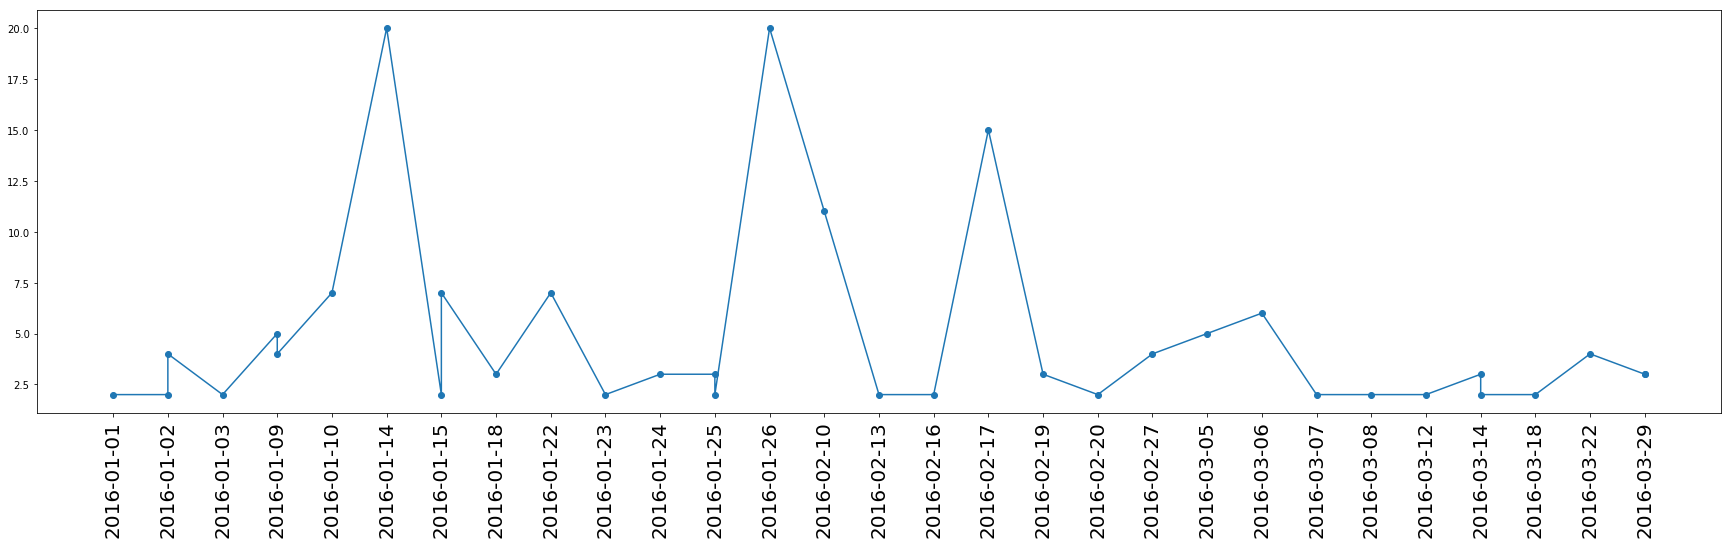

In [38]:
print(len(df_new_hpg))
df_graph_hpg = df_new_hpg[(df_new_hpg.air_store_id=='air_08cb3c4ee6cd6a22')&(df_new_hpg.visit_date<'2016-03-30')]

plt.plot(df_graph_hpg.visit_date, df_graph_hpg.reserve_visitors, marker='o')
plt.subplots_adjust(left=0.1,right=4,wspace=0.25,hspace=0.25,bottom=0.1,top=1.5)
plt.xticks(rotation=90, size=20)

In [37]:
'2016-05-14' < '2016-03-30'

False